# Logistic Regression (Rainfall Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether the weather is rainy or sunny, using a Logistic Regression algorithm.

### Column Descriptions

- **date**: The date when the weather observation was recorded
- **rainfall**: The amount of precipitation (rain) recorded
- **temperature**: The average air temperature of the day
- **humidity**: The relative humidity level
- **wind_speed**: The average speed of the wind
- **weather_condition**: The target label indicating the weather status (e.g., 'Rainy' or 'Sunny').

## A. Data Preparation

### A.1 Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [36]:
try:
    df = pd.read_csv("rainfall.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [37]:
df.shape

(54, 6)

### A.4 Viewing Data Informations

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


### A.5 Viewing Data Statistics

In [39]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
rainfall,53.00,9.05,6.71,0.00,3.90,8.30,14.80,21.80
temperature,53.00,17.95,2.50,13.90,16.10,17.80,19.40,23.40
humidity,53.00,69.25,11.97,44.00,62.00,72.00,78.00,89.00
wind_speed,53.00,6.40,2.21,2.10,4.70,6.70,8.30,10.50


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [40]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [41]:
df.tail()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
49,2022-02-19,17.3,15.9,83.0,8.6,Rainy
50,2022-02-20,9.6,18.6,71.0,6.7,Rainy
51,2022-02-21,0.0,21.3,55.0,5.1,Sunny
52,2022-02-22,7.4,16.8,77.0,8.9,Rainy
53,Co,NaN,NaN,NaN,NaN,NaN


### A.7 Viewing Duplicated Data

In [42]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [43]:
df.isna().sum()

date                 0
rainfall             1
temperature          1
humidity             1
wind_speed           1
weather_condition    1
dtype: int64

In [44]:
df.dropna(inplace=True)

### A.9 Viewing Outliers

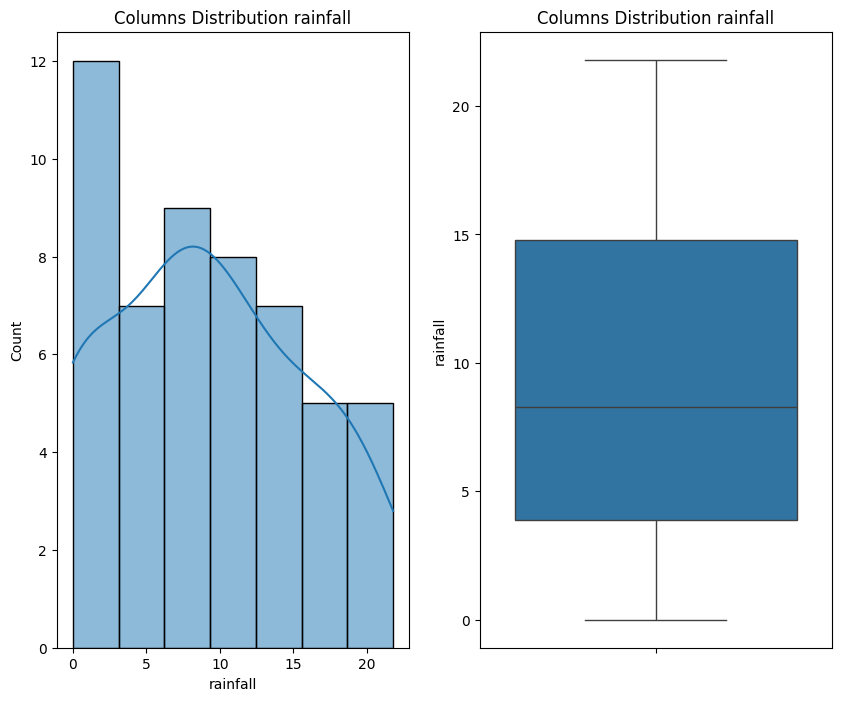

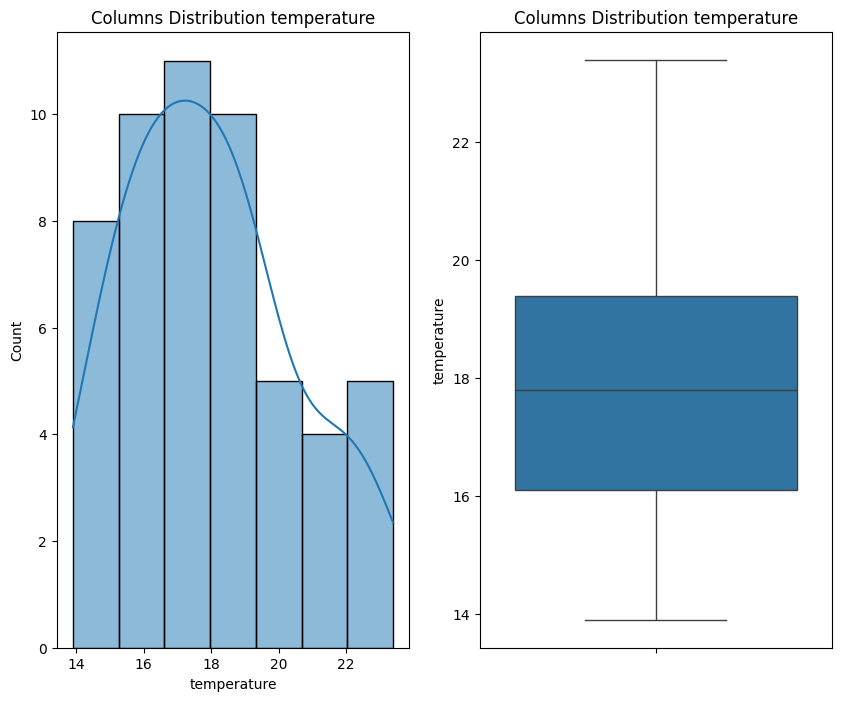

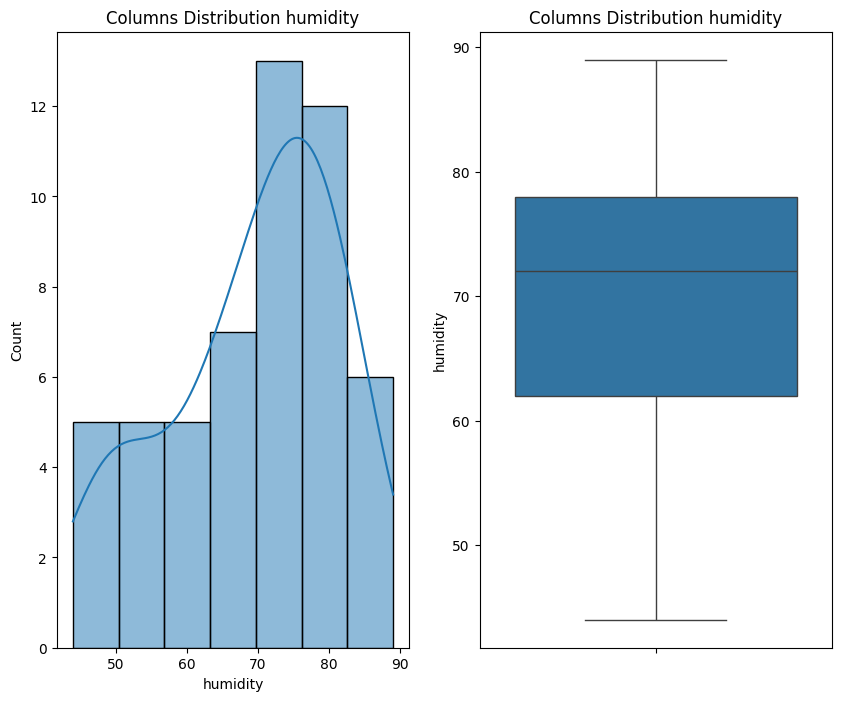

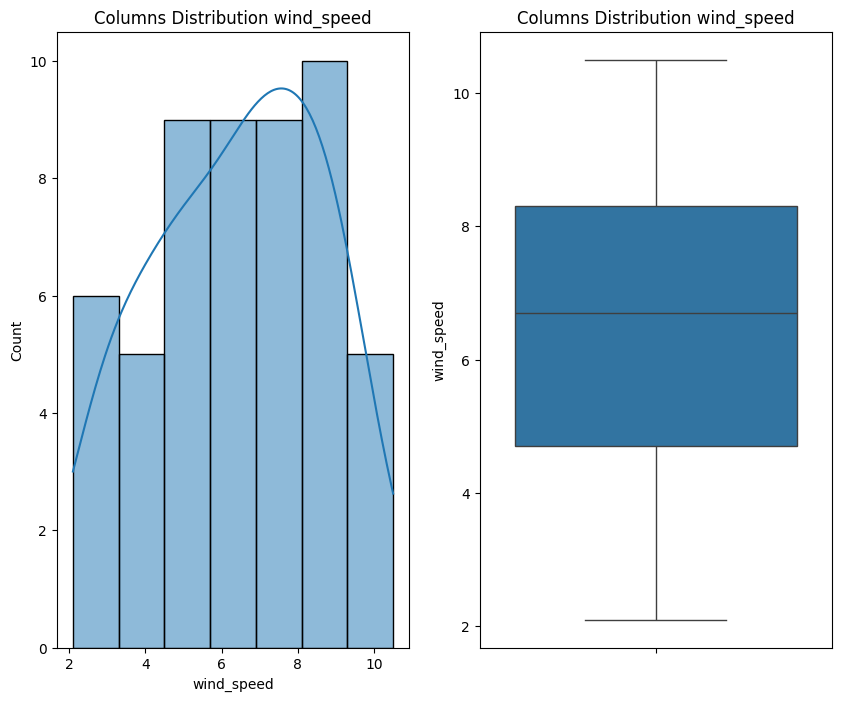

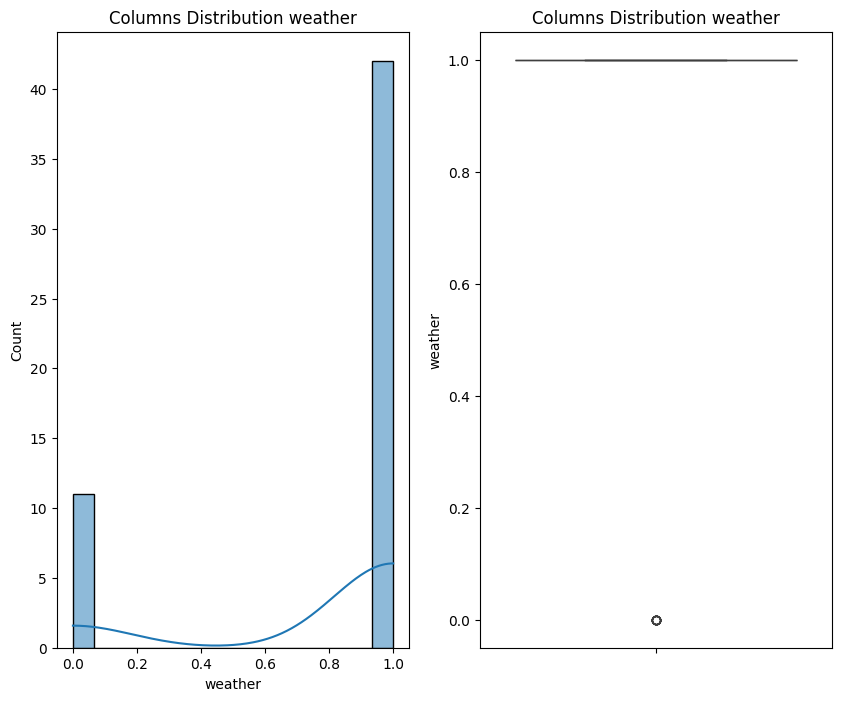

In [139]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col],kde = True, ax = axes[0])
 axes[0].set_title(f"Columns Distribution {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Columns Distribution {col}")

## B. Data Preprocessing

### B.1 Convert Column Datatype

In [46]:
df['date'] = pd.to_datetime(df['date'])

In [47]:
df['date'].head()

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
Name: date, dtype: datetime64[ns]

### B.2 Mapping Label

In [48]:
weather_mapping = {"Sunny" : 0, "Rainy" : 1}
df['weather'] = df['weather_condition'].map(weather_mapping)

In [49]:
df.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition,weather
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy,1
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy,1
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny,0
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy,1
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy,1


## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

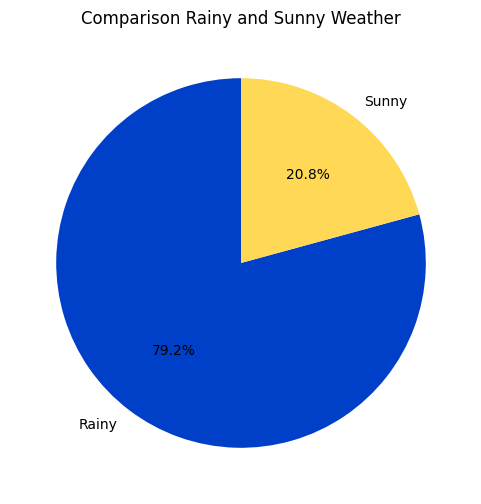

In [50]:
plt.figure(figsize=(6, 6))
df['weather_condition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#003fc7", "#ffd856"])
plt.title("Comparison Rainy and Sunny Weather")
plt.ylabel(None)
plt.show()

### C.2 Bivariate Analysis

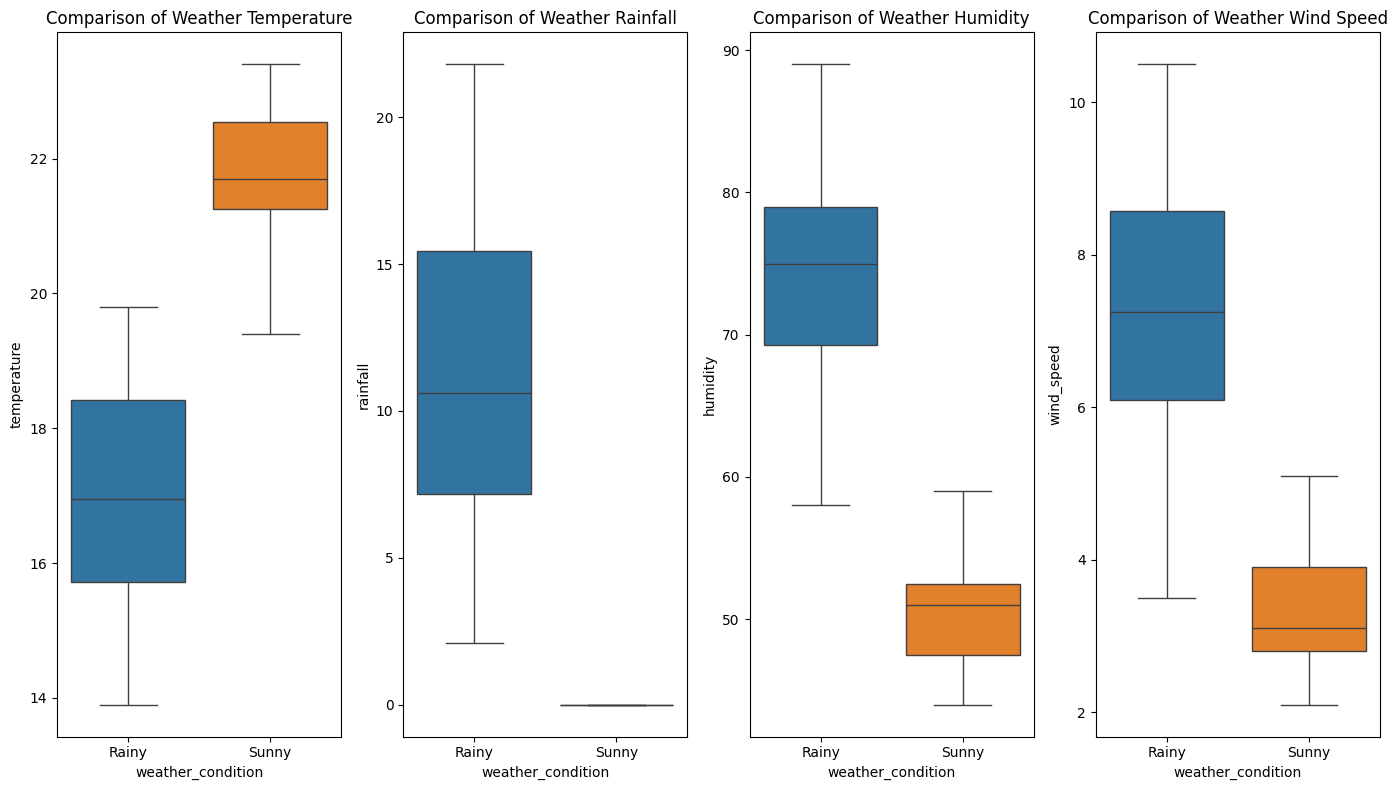

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(14, 8))

sns.boxplot(x='weather_condition', y='temperature', data=df, hue='weather_condition', ax=axes[0])
axes[0].set_title("Comparison of Weather Temperature")

sns.boxplot(x='weather_condition', y='rainfall', data=df, hue='weather_condition', ax=axes[1])
axes[1].set_title("Comparison of Weather Rainfall")

sns.boxplot(x='weather_condition', y='humidity', data=df, hue='weather_condition', ax=axes[2])
axes[2].set_title("Comparison of Weather Humidity")

sns.boxplot(x='weather_condition', y='wind_speed', data=df, hue='weather_condition', ax=axes[3])
axes[3].set_title("Comparison of Weather Wind Speed")

plt.tight_layout()
plt.show()

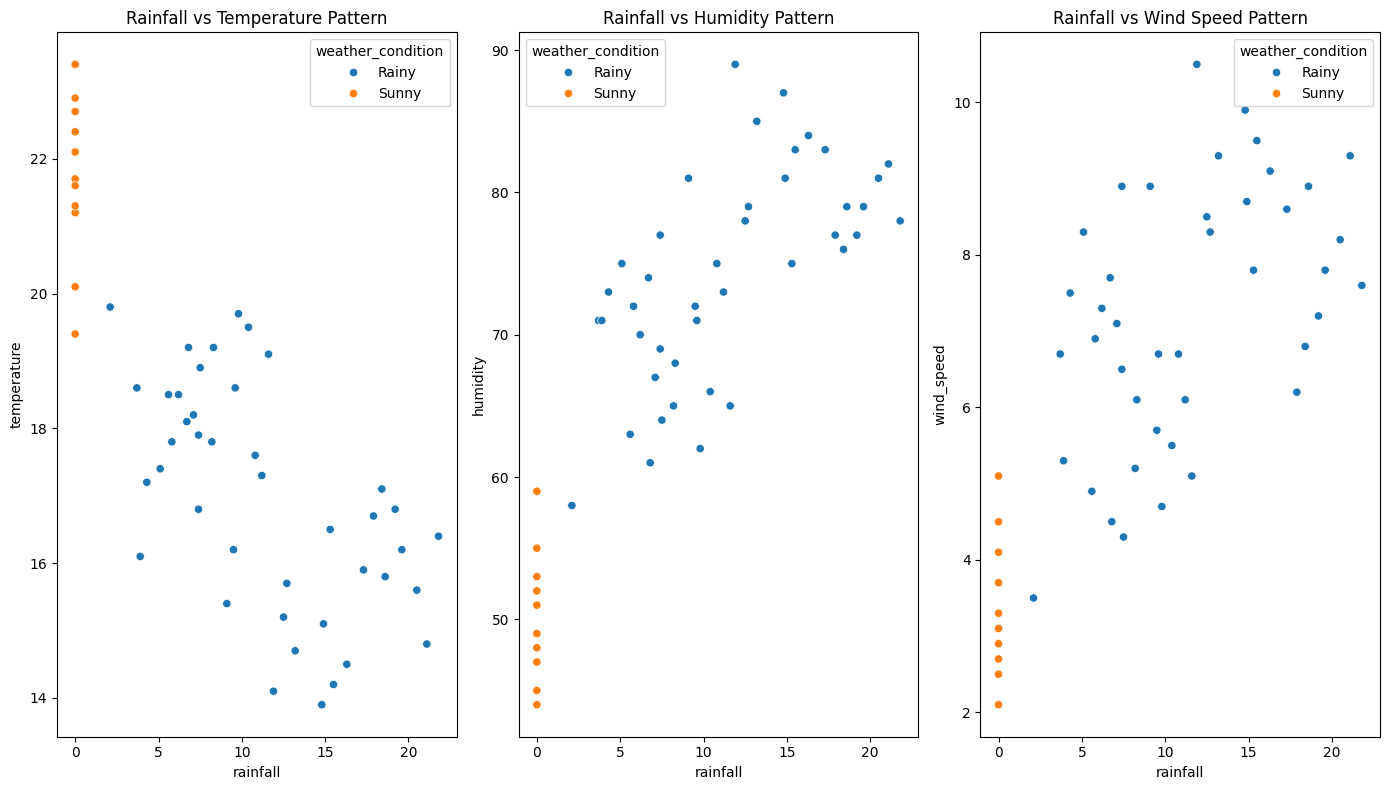

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(14, 8))

sns.scatterplot(x='rainfall', y='temperature', data=df, hue='weather_condition', ax=axes[0])
axes[0].set_title("Rainfall vs Temperature Pattern")

sns.scatterplot(x='rainfall', y='humidity', data=df, hue='weather_condition', ax=axes[1])
axes[1].set_title("Rainfall vs Humidity Pattern")

sns.scatterplot(x='rainfall', y='wind_speed', data=df, hue='weather_condition', ax=axes[2])
axes[2].set_title("Rainfall vs Wind Speed Pattern")

plt.tight_layout()
plt.show()

### C.3 Multivariate Analysis

<Axes: >

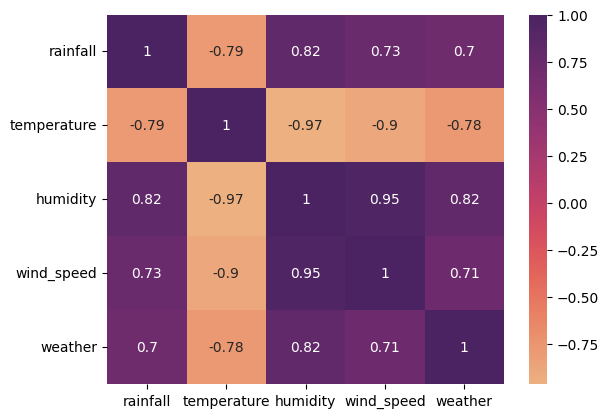

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare')

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [54]:
X_data = df.drop(columns=['date', 'weather', 'weather_condition'])
y_data = df['weather']

### D.2 Normalize Features

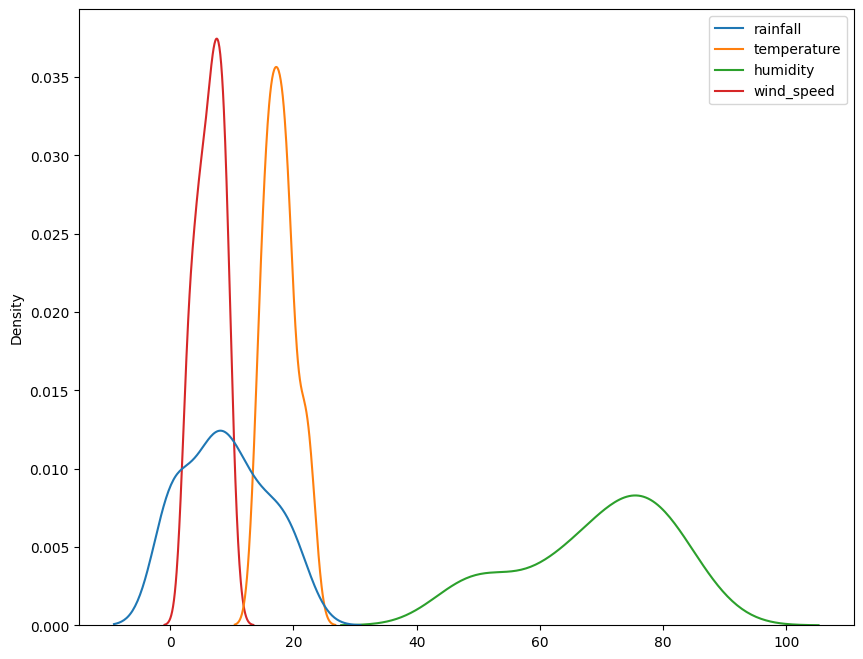

In [55]:
plt.figure(figsize=(10, 8))
sns.kdeplot(X_data, legend=True)
plt.show()

In [56]:
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())

In [57]:
X_data.head()

,rainfall,temperature,humidity,wind_speed
0,0.573394,0.136842,0.755556,0.761905
1,0.376147,0.410526,0.466667,0.369048
2,0.000000,0.652632,0.177778,0.119048
3,0.169725,0.494737,0.600000,0.547619
4,0.967890,0.094737,0.844444,0.857143


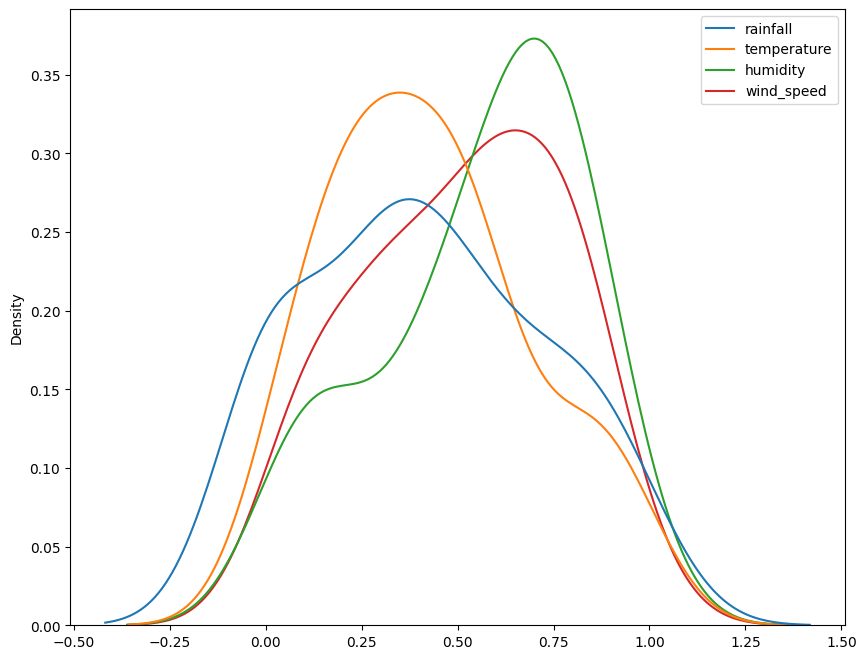

In [58]:
plt.figure(figsize=(10, 8))
sns.kdeplot(X_data, legend=True)
plt.show()

### D.3 Splitting Train Data and Test Data (80:20)

In [59]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.4 Logistic Regression Formulas

#### Logit

In [60]:
def linear_equation(X, w, b):
    z = np.dot(X, w) + b
    return z

#### Sigmoid

In [61]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Loss Function

In [62]:
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

#### Gradient Descent


In [63]:
def grad_desc(X, y_true, y_pred):
    m = X.shape[0]
    error = y_pred - y_true
    
    dw = (1 / m) * np.dot(X.T, error)
    db = (1 / m) * np.sum(error)
    return dw, db

#### Update Parameter

In [64]:
def update_parameters(w, b, dw, db, learning_rate):
    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db
    return w_new, b_new

### D.5 Logistic Regression Training & Updating

In [120]:
# 1. Parameter Initialization
w = np.zeros(X_train.shape[1])
b = 0
learning_rate = 0.02
epochs = 2500
loss_history = []
accuracy_history = []

# 2. Learning Loop
print("Start Training:")
for i in range(epochs):
    # A. Forward Pass
    z = linear_equation(X_train, w, b)
    y_pred = sigmoid(z) 
    
    # B. Error & Accuracy History
    loss = log_loss(y_train, y_pred)
    loss_history.append(loss)
    pred = (y_pred >= 0.5).astype(int)
    acc = np.mean(pred == y_train)
    accuracy_history.append(acc)
    
    # C. Backward Pass
    dw, db = grad_desc(X_train, y_train, y_pred)
    
    # D. Update Parameter
    w, b = update_parameters(w, b, dw, db, learning_rate)
    
    # E. Print Progress
    if i % 100 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f} | Accuracy = {acc:.4f}")

print("Training Done")

Start Training:
Epoch 0: Loss = 0.6931 | Accuracy = 0.8049
Epoch 100: Loss = 0.4525 | Accuracy = 0.8049
Epoch 200: Loss = 0.3873 | Accuracy = 0.8049
Epoch 300: Loss = 0.3538 | Accuracy = 0.8049
Epoch 400: Loss = 0.3297 | Accuracy = 0.8049
Epoch 500: Loss = 0.3100 | Accuracy = 0.8049
Epoch 600: Loss = 0.2930 | Accuracy = 0.8049
Epoch 700: Loss = 0.2781 | Accuracy = 0.8293
Epoch 800: Loss = 0.2649 | Accuracy = 0.8780
Epoch 900: Loss = 0.2531 | Accuracy = 0.8780
Epoch 1000: Loss = 0.2426 | Accuracy = 0.9024
Epoch 1100: Loss = 0.2330 | Accuracy = 0.9024
Epoch 1200: Loss = 0.2244 | Accuracy = 0.9268
Epoch 1300: Loss = 0.2166 | Accuracy = 0.9268
Epoch 1400: Loss = 0.2095 | Accuracy = 0.9268
Epoch 1500: Loss = 0.2030 | Accuracy = 0.9512
Epoch 1600: Loss = 0.1970 | Accuracy = 0.9512
Epoch 1700: Loss = 0.1915 | Accuracy = 0.9512
Epoch 1800: Loss = 0.1864 | Accuracy = 0.9512
Epoch 1900: Loss = 0.1816 | Accuracy = 0.9512
Epoch 2000: Loss = 0.1772 | Accuracy = 0.9512
Epoch 2100: Loss = 0.1731 | Ac

### D.6 Model Training Visualization

#### Loss Function

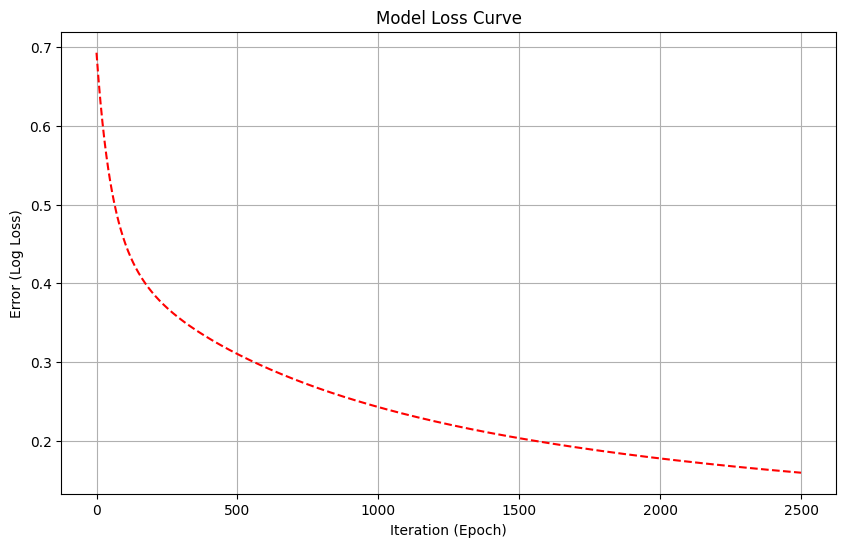

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss', color='red', linestyle='--')
plt.title('Model Loss Curve')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Error (Log Loss)')
plt.grid(True)
plt.show()

#### Accuracy Model

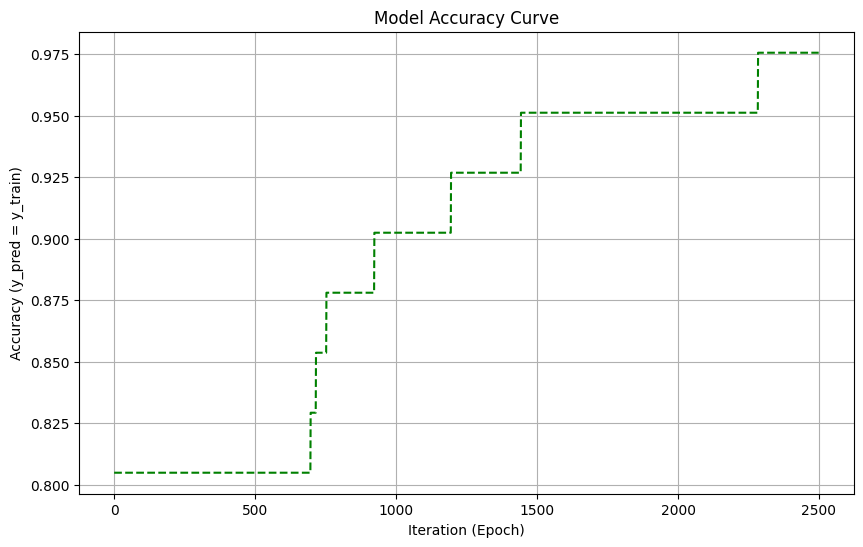

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_history, label='Training Accuracy', color='green', linestyle='--')
plt.title('Model Accuracy Curve')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Accuracy (y_pred = y_train)')
plt.grid(True)
plt.show()

### D.7 Logistic Regression Prediction

In [121]:
def predict(X, w, b, threshold=0.5):
    z = linear_equation(X, w, b)
    y_prob = sigmoid(z)
    
    y_class = [1 if p > threshold else 0 for p in y_prob]
    return np.array(y_class)

## E. Evaluation

### E.1 Model Accuracy

#### Test Accuracy

In [122]:
test_predictions = predict(X_test, w, b)
test_accuracy = np.mean(test_predictions == y_test)
print(f"{test_accuracy:.2f}")

1.00


#### Train Accuracy

In [123]:
train_predictions = predict(X_train, w, b)
train_accuracy = np.mean(train_predictions == y_train)
print(f"{train_accuracy:.2f}")

0.98


### E.2 Confusion Matrix

In [129]:
pred_array = np.array(test_predictions)
test_array = np.array(y_test)

TP = np.sum((pred_array == 1) & (test_array == 1))
FP = np.sum((pred_array == 1) & (test_array == 0))
FN = np.sum((pred_array == 0) & (test_array == 1))
TN = np.sum((pred_array == 0) & (test_array == 0))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives: {TN}")

True Positives: 9
False Positives: 0
False Negatives: 0
True Negatives: 3


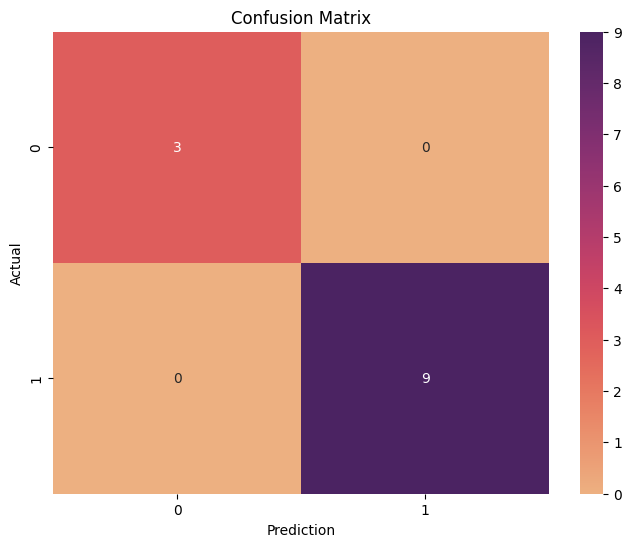

Class: Sunny
True Positives: 3
False Positives: 0
False Negatives: 0
True Negatives: 9

Class: Rainy
True Positives: 9
False Positives: 0
False Negatives: 0
True Negatives: 3



In [134]:
confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        classes = "Sunny"
    else:
        classes = "Rainy"
        
    print(f"Class: {classes}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [136]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision:.2f}")

1.00


### E.4 Recall

In [137]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall:.2f}")

1.00


### E.5 F-1 Score

In [138]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1:.2f}")

1.00
